In [ ]:
#install and import packages
!pip install --upgrade scikit-learn
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#read and display data
data = pd.read_csv("/content/winequality-red.csv", sep = ";")
data

FileNotFoundError: ignored

In [ ]:
#split into features/target
x = data.drop(columns = ['quality'])
#attemptd normalization at one point but this step yielded lower performance
#x_norm = sklearn.preprocessing.normalize(x, axis=0)
y = data['quality']

#split into training and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   x, y, test_size=0.2, random_state=42)

In [ ]:
def return_metrics(y_test, y_pred):
  print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred_cls))
  print(metrics.balanced_accuracy_score(y_test, y_pred))
  print(metrics.classification_report(y_test, y_pred))
  print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
models = [linear_model.RidgeClassifier(), ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), linear_model.Perceptron(), linear_model.SGDClassifier(), ]
for model in models:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return_metrics(y_test, y_pred)

Accuracy: 0.56


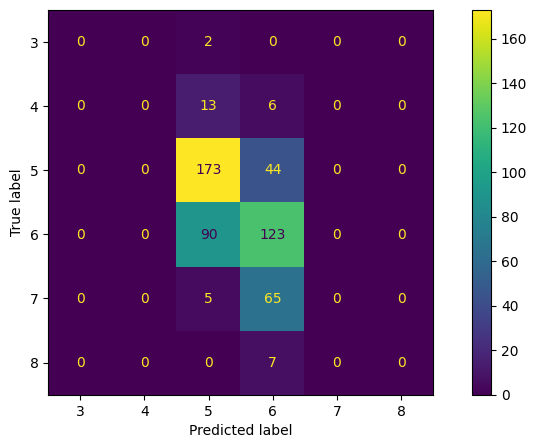

In [ ]:
#plot confusion matrix to visualize true/false positives/negatives among classes
fig, ax = plt.subplots(figsize=(10, 5))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cls, ax=ax)